# Imports and initial settings

In [1]:
import mysql.connector
import matplotlib.pyplot as plt
import requests
import json
import pandas as pd
import numpy as np
import re
import networkx as nx
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from itertools import *
from helper import *
from matplotlib import colors


In [2]:
plt.rcParams['figure.figsize'] = [9, 6]
# n_trials    = 180
n_trials    = 150
n_trials_tt = int(n_trials/3)
# n_split     = 3
n_split     = 6
# n_split     = 10

plot_indiv = False

API_URL = "http://134.76.24.67/node" 

# Visualizing ground truth latent structure and the latent structures as learned by models

From here on, we refer to the latent structure as an 'adjacency matrix'. This adjacency matrix is referred to when generating silhouettes by connecting 4 building blocks. Essentially, the adjacency matrix tells us which building block connections are permitted and which aren't. For now, we only deal with logical/discrete matrix, containing a value of either 0 for no the blocks identified can't be connected or 1 meaning the blocks could be connectd.

In [3]:
# Loading the adjacencies

ground_truth = np.load(f"C:\\Users\\kmedriano\\Documents\\Cactus\\tests\\adjacency\\Adjacency_20220810-125812.npy")
t_co_occurence_learned = np.load(f"C:\\Users\\kmedriano\\Documents\\Cactus\\tests\\learned_adjacency\\co_occurence_learned.npy")
t_connected_learned = np.load(f"C:\\Users\\kmedriano\\Documents\\Cactus\\tests\\learned_adjacency\\connected_learned.npy")


In [184]:
opp = np.ones(ground_truth.shape)-ground_truth
#opp = np.fill_diagonal(opp, 0)
opp

array([[1., 1., 1., 1., 0., 0.],
       [1., 1., 0., 0., 1., 1.],
       [1., 0., 1., 0., 1., 0.],
       [1., 0., 0., 1., 1., 1.],
       [0., 1., 1., 1., 1., 0.],
       [0., 1., 0., 1., 0., 1.]])

In [185]:
np.fill_diagonal(opp, 0)
opp

array([[0., 1., 1., 1., 0., 0.],
       [1., 0., 0., 0., 1., 1.],
       [1., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 1., 1.],
       [0., 1., 1., 1., 0., 0.],
       [0., 1., 0., 1., 0., 0.]])

Here is the ground truth adjacency matrix:

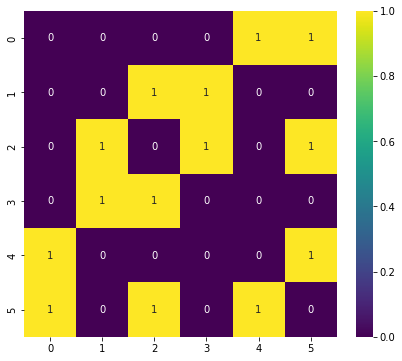

In [5]:
sns.heatmap(ground_truth, cmap='viridis', annot=True)
plt.gcf().set_size_inches(7, 6)

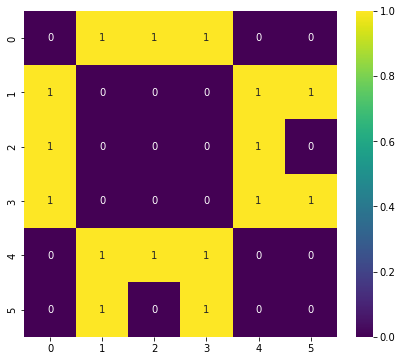

In [186]:
# The "opposite" adjacency matrix

sns.heatmap(opp, cmap='viridis', annot=True)
plt.gcf().set_size_inches(7, 6)

The adjacency matrix as learned by the co_occurence model

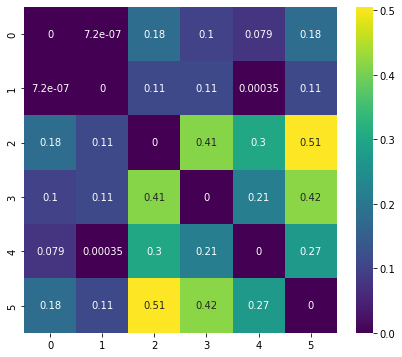

In [6]:
sns.heatmap(t_co_occurence_learned, cmap='viridis', annot=True)
plt.gcf().set_size_inches(7, 6)

The adjacency matrix as learned by the connectedness model

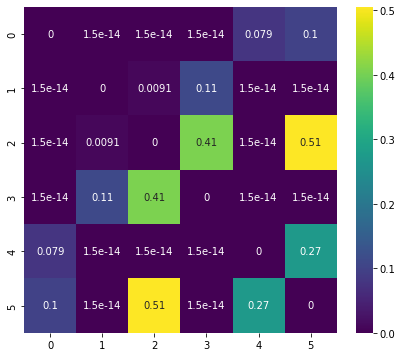

In [7]:
sns.heatmap(t_connected_learned, cmap='viridis', annot=True)
plt.gcf().set_size_inches(7, 6)

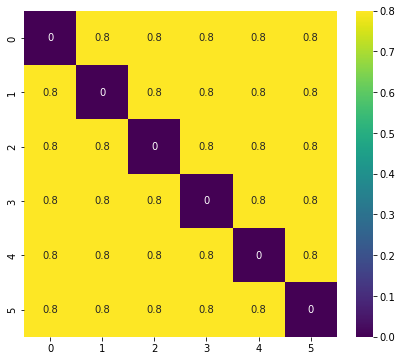

In [84]:
# Visualizing the uniform prior

prior = np.ones((6,6), float)*(12/math.comb(6,4))
np.fill_diagonal(prior,0)

sns.heatmap(prior, cmap='viridis', annot=True)
plt.gcf().set_size_inches(7, 6)

In [188]:
container = [ground_truth, opp, t_co_occurence_learned, t_connected_learned]

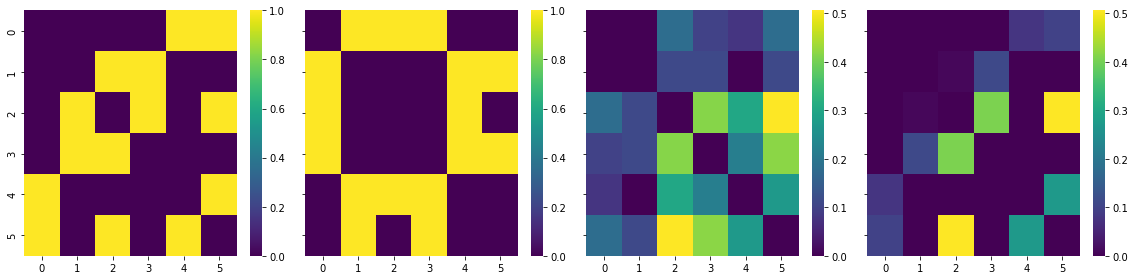

In [189]:
### Need for the values to 

fig,axn = plt.subplots(nrows=1, ncols=4, sharex=True, sharey=True, figsize=(16,4))

for i, ax in enumerate(axn.flat):
    sns.heatmap(container[i], ax=ax,
                cmap='viridis')
    
plt.tight_layout()

### Visualizing the adjacency matrix as graphs

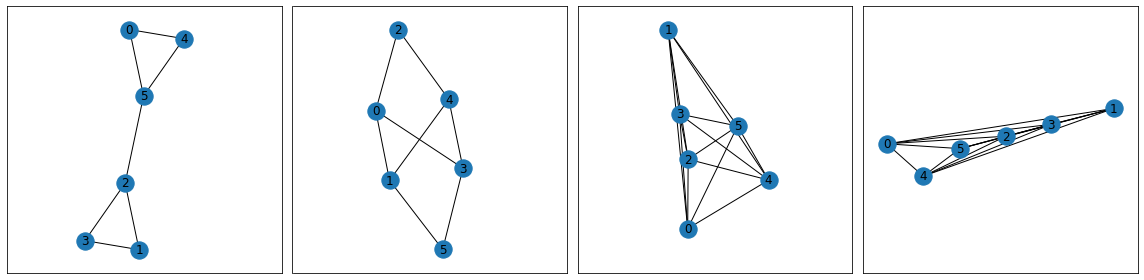

In [190]:
fig,axn = plt.subplots(nrows=1, ncols=4, sharex=True, sharey=True, figsize=(16,4))

for i, ax in enumerate(axn.flat):
    G = nx.from_numpy_matrix(container[i])
    nx.draw_networkx(G, ax=ax)
    
    #ax.set_title(f'sample title')

plt.tight_layout()

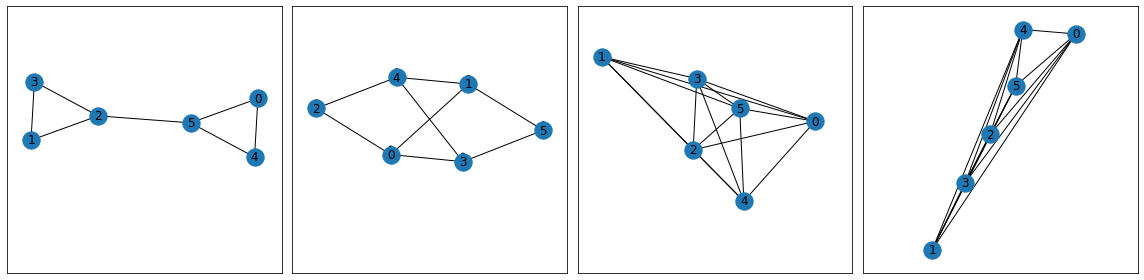

In [100]:
#### GRAPH PIPELINE!!!

# load graph from adjacencies
# compute similarity
# plot the navigation task performance




# Similarity measure

In [63]:
import netrd

In [64]:
G_ground_truth = nx.from_numpy_matrix(ground_truth)
G_opp = nx.from_numpy_matrix(opp)

In [65]:
dist = netrd.distance.DeltaCon()
D1 = dist.dist(G_ground_truth,G_opp)

<class 'networkx.utils.decorators.argmap'> compilation 16:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


In [68]:
# Another way to get the distance
D = dist.results['dist']
D

1.625322873592553

In [70]:
# ground truth and co_occur

dist = netrd.distance.DeltaCon()
D3 = dist.dist(G_ground_truth,G_co_occurence)
D3_res = dist.results['dist']
D3_res

<class 'networkx.utils.decorators.argmap'> compilation 16:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


1.0122575420123734

In [71]:
# ground truth and connected

dist = netrd.distance.DeltaCon()
D2 = dist.dist(G_ground_truth,G_connected)
D2_res = dist.results['dist']
D2_res

1.1818623163677988

In [72]:
# ground truth and ground truth

dist = netrd.distance.DeltaCon()
D0 = dist.dist(G_ground_truth,G_ground_truth)
D0_res = dist.results['dist']
D0_res

<class 'networkx.utils.decorators.argmap'> compilation 16:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


0.0

In [75]:
zero = np.zeros(ground_truth.shape)
ident = np.ones(ground_truth.shape)

G_0 = nx.from_numpy_matrix(zero)
G_1 = nx.from_numpy_matrix(ident)

In [76]:
# ground truth and zero

dist = netrd.distance.DeltaCon()
D0 = dist.dist(G_ground_truth,G_0)
D0_res = dist.results['dist']
D0_res

<class 'networkx.utils.decorators.argmap'> compilation 16:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


2.164321619224577

In [77]:
# ground truth and identity

dist = netrd.distance.DeltaCon()
D0 = dist.dist(G_ground_truth,G_1)
D0_res = dist.results['dist']
D0_res

2.1048357464091483

In [81]:
# zero and identity

dist = netrd.distance.DeltaCon()
D0 = dist.dist(G_0,G_1)
D0_res = dist.results['dist']
D0_res

<class 'networkx.utils.decorators.argmap'> compilation 16:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


3.8166109111704696

# Get Participant Data

### Trial data

In [14]:
# get trial info
r = requests.get(API_URL+"/trial")
print("Status:",r.status_code)
pd_data = []
trials = json.loads(r.text)
for t in trials:
    record = [t["trial_id"], t["session_id"],t["silhouette_id"], t["time_stamp"], t["reward"], t["timeout"], t["experiment_part"],t["trial_type"]]
    pd_data.append(record)
print("Found", len(pd_data), "trials")    
trial_df = pd.DataFrame(pd_data, columns=['trial_id','session_id','silhouette_id', 'time_stamp', 'reward', 'timeout','experiment_part', 'trial_type'])

Status: 200
Found 32268 trials


In [15]:
trial_df.head()

,trial_id,session_id,silhouette_id,time_stamp,reward,timeout,experiment_part,trial_type
0,1,1,149,1636029597122,0,0.0,NaN,NaN
1,2,1,39,1636029607072,0,NaN,NaN,NaN
2,3,2,104,1636029691260,0,0.0,NaN,NaN
3,4,2,203,1636029700067,0,0.0,NaN,NaN
4,5,2,159,1636029706274,1,0.0,NaN,NaN


### Silhouette data

In [16]:
# get silhouette info
r = requests.get(API_URL+"/silhouette")
print("Status:", r.status_code)
pd_data = []
silhouettes = json.loads(r.text)
for s in silhouettes:
    record = [s["silhouette_id"], s["solution"], s["trial_type"]]
    pd_data.append(record)

# print(s)
print("Found", len(pd_data), "silhouettes")
    
silhouette_df = pd.DataFrame(pd_data, columns=["silhouette_id","solution","trial_type"])

Status: 200
Found 2220 silhouettes


In [428]:
sils_trtype2 = silhouette_df[silhouette_df["trial_type"] == 2].sort_values(by=["silhouette_id"])

In [430]:
sils_trtype2[sils_trtype2["silhouette_id"] == 0] # why???

,silhouette_id,solution,trial_type
180,0,"[{""x"":4, ""y"":3, ""id"":0},{""x"":4, ""y"":1, ""id"":2}...",2
2070,0,"[{""x"":5, ""y"":6, ""id"":0},{""x"":4, ""y"":2, ""id"":2}...",2
1920,0,"[{""x"":2, ""y"":5, ""id"":0},{""x"":5, ""y"":2, ""id"":1}...",2
1770,0,"[{""x"":5, ""y"":4, ""id"":2},{""x"":5, ""y"":2, ""id"":3}...",2
1110,0,"[{""x"":3, ""y"":2, ""id"":0},{""x"":3, ""y"":4, ""id"":1}...",2
1620,0,"[{""x"":6, ""y"":5, ""id"":0},{""x"":4, ""y"":3, ""id"":2}...",2
1470,0,"[{""x"":5, ""y"":5, ""id"":0},{""x"":4, ""y"":6, ""id"":2}...",2


In [426]:
silhouette_df[silhouette_df["trial_type"] == 2]["silhouette_id"]

array([  1,   4,   8,  16,  18,  20,  21,  22,  25,  35,  36,  37,  44,
        47,  49,  50,  51,  54,  56,  57,  58,  68,  69,  71,  74,  75,
        77,  86,  93,  95,  96,  98, 103, 105, 106, 114, 117, 118, 120,
       121, 123, 124, 129, 130, 134, 140, 141, 143, 148, 149, 151, 152,
       161, 162, 163, 165, 166, 175, 176, 179,   0,   6,   9,  11,  12,
        14,  26,  31,  32,  34,  38,  40,  42,  45,  60,  70,  73,  78,
        79,  83,  84,  85,  92, 100, 104, 107, 108, 113, 116, 119, 136,
       138, 139, 146, 147,   2,   3,  10,  23,  30,  33,  52,  53,  72,
        81,  82,  87,  88,  89,  91,  97, 112, 115, 122, 126, 133, 144,
         5,  17,  28,  39,  48,  61,  64,  67,  76,  99, 101, 110, 127,
       132, 135, 137, 142, 145,   7,  15,  24,  43,  46,  55,  59,  94,
       102, 131, 155, 157, 170, 177,  63,  80, 109, 111,  27,  29,  62,
        66, 128,  13,  65, 125, 154, 164, 168, 169, 171, 174,  19,  90,
       153, 158, 172,  41], dtype=int64)

### Session data

In [18]:
# get session info
r = requests.get(API_URL+"/session")
print("Status:",r.status_code)
pd_data = []
sessions = json.loads(r.text)
for s in sessions:
    # print(s)
    record = [s["session_id"], s["participant_id"], s["comment"]]
    pd_data.append(record)
    # print(s["comment"])

# print(s)
print("Found", len(pd_data), "sessions")    

session_df = pd.DataFrame(pd_data, columns=['session_id', 'participant_id', 'comment'])

Status: 200
Found 1229 sessions


In [19]:
session_df.head()

,session_id,participant_id,comment
0,1,1337,None
1,2,1337,None
2,3,1337,None
3,4,1337,None
4,5,1337,None


### Actions data

In [20]:
# get actions
r = requests.get(API_URL+"/action")
print("Status:", r.status_code)
pd_data = []
actions = json.loads(r.text)
for a in actions:
    if a["building_block"] in [str(i) for i in range(9)]:
        record = [a["action_id"], a["trial"], int(a["building_block"]), a["reaction_time"], a["selected"]==1]
        pd_data.append(record)
print("Found", len(pd_data), "actions")
    
action_df = pd.DataFrame(pd_data, columns=['action_id', 'trial_id', 'building_block', 'reaction_time', 'selected'])

Status: 200
Found 96836 actions


In [21]:
action_df.head()

,action_id,trial_id,building_block,reaction_time,selected
0,1,1,5,6.077,True
1,2,1,4,1.425,True
2,3,1,6,1.081,True
3,4,1,3,0.680,True
4,5,3,4,5.079,True


### Navigation data

In [88]:
# get navigation actions
r = requests.get(API_URL+"/navigation")
print("Status:", r.status_code)
pd_data = []
navigation = json.loads(r.text)
for a in navigation:
  # print(a)
  record = [a["session_id"], a["stim_left"], a["stim_right"], a["solution"], a["selected"], a["trial"], a["show_length"]]
  pd_data.append(record)
    
navigation_df = pd.DataFrame(pd_data, columns=['session_id', 'stim_left', 'stim_right', 'solution', 'selected', 'trial', 'show_length'])
navigation_df.head()

Status: 200


,session_id,stim_left,stim_right,solution,selected,trial,show_length
0,1130,1,3,"4,0","4,0",0,NaN
1,1130,1,5,"4,3,0,2",4,1,NaN
2,1130,3,0,"4,1",2,2,NaN
3,1130,5,1,"0,2,3","5,2,1",3,NaN
4,1130,5,1,"3,0,2,4","1,0",4,NaN


In [105]:
# get association data
r = requests.get(API_URL+"/association")
print("Status:", r.status_code)
pd_data = []
association = json.loads(r.text)
for a in association:
  # print(a)
  record = [a["session_id"], a["trial"], a["building_block_id"], a["target"], a["pressed"], a["building_block_shown"], a["target_is_bb"]]
  pd_data.append(record)
    
association_df = pd.DataFrame(pd_data, columns=['session_id', 'trial', 'building_block_id', 'target', 'pressed', 'building_block_shown', 'target_is_bb'])
association_df.head()

Status: 200


,session_id,trial,building_block_id,target,pressed,building_block_shown,target_is_bb
0,1011,0,5,1,0,0,1
1,1011,0,5,1,0,1,1
2,1011,1,2,1,1,0,1
3,1011,1,2,1,0,1,1
4,1011,2,3,1,1,0,1


In [109]:
association_df.loc[:,"pressed"].unique()

array([0, 1], dtype=int64)

In [114]:
association_df.loc[:,"building_block_id"].unique()

array([5, 2, 3, 1, 4, 0], dtype=int64)

In [111]:
association_df.loc[:,"target"].unique()

array([1, 3, 4, 5, 0, 2], dtype=int64)

In [112]:
association_df.loc[:,"target_is_bb"].unique()

array([1, 0], dtype=int64)

In [113]:
association_df.loc[:,"building_block_shown"].unique()

array([0, 1], dtype=int64)

In [92]:
for i in np.arange(navigation_df.shape[1]):
    print(type(navigation_df.iloc[0,i]))

<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'str'>
<class 'str'>
<class 'numpy.int64'>
<class 'numpy.float64'>


In [93]:
ids = [1195,1197,1199,1203,1204,1210,1211,1214,1215,1223]

In [119]:
navigation_df.head()

,session_id,stim_left,stim_right,solution,selected,trial,show_length
0,1130,1,3,"4,0","4,0",0,NaN
1,1130,1,5,"4,3,0,2",4,1,NaN
2,1130,3,0,"4,1",2,2,NaN
3,1130,5,1,"0,2,3","5,2,1",3,NaN
4,1130,5,1,"3,0,2,4","1,0",4,NaN


In [120]:
sess_split_t = np.arange(0,n_trials_assoc,n_trials_assoc/n_split).astype(int)
sess_split_t

array([  0,  25,  50,  75, 100, 125])

In [ ]:
### For the navigation task, for correct performance, i just need to check solution == selected 

n_trials_assoc = 150

# Behavioral analysis from Philipp

correct_prior = [1195,1197,1199,1203,1204]
incorrect_prior = [1210,1211,1214,1215,1223]

n_split = 6 # why is this 6??
mean_nav = np.zeros((np.size(ids,0),n_split)) # what is n_split for?? : matrix rows participants, columns n_split idk what for, the split is for binning the average 

mean_ass_debrief = np.zeros((np.size(ids,0))) # len = no of participants

sess_split_t = np.arange(0,n_trials_assoc,n_trials_assoc/n_split).astype(int) # linspace from 0 to n_trial_assoc, with interval; for plotting over time 

step_size_t = int(n_trials_assoc/n_split)

subj_count = 0
for session_id in ids: 

  print("\nSession ", session_id)
  if session_id in correct_prior: 
    print("correct prior")
  else: 
    print("incorrect prior")

  trials = navigation_df[navigation_df['session_id'] == session_id] # trials per participant

  solution = trials["solution"].to_numpy() 

  selected = trials["selected"].to_numpy()

  idx_corr = solution==selected # why is it called idx_corr: basically if correct or not

  correct_trls = np.zeros_like(idx_corr) # initialization 

  correct_trls[np.where(idx_corr==True)[0]] = 1 # boolean to int/flt

  split_count = 0
  for idx_split in sess_split_t:
    if idx_split == sess_split_t[-1]:
      mean_nav[subj_count,split_count] = np.mean(correct_trls[idx_split:])   # ahhh average within interval
    else:
      mean_nav[subj_count,split_count] = np.mean(correct_trls[idx_split:idx_split+step_size_t])   # ahhh average within interval
    split_count += 1 # what's the split count for???

  # Association learning
  trials_assoc = association_df[association_df['session_id'] == session_id]

  BB_shown             = trials_assoc["building_block_id"].to_numpy()
  target               = trials_assoc["target"].to_numpy()
  pressed              = trials_assoc["pressed"].to_numpy()
  building_block_shown = trials_assoc["building_block_shown"].to_numpy()
  target_is_bb         = trials_assoc["target_is_bb"].to_numpy()

  correct_assoc = []
  for trls in np.arange(len(BB_shown)):
    if (BB_shown[trls]==target[trls] and building_block_shown[trls]==target_is_bb[trls]):
      correct_assoc.append(pressed[trls])

  # # Association Debrief
  # # association_debriefing_df = pd.DataFrame(pd_data, columns=['session_id', 'trial', 'target', 'selected'])
  # trials_assoc_debrief = association_debriefing_df[association_debriefing_df['session_id'] == session_id]
  # target               = trials_assoc_debrief["target"].to_numpy()
  # selected             = trials_assoc_debrief["selected"].to_numpy()

  # idx_corr = target==selected

  # correct_assoc_debrief = np.zeros_like(idx_corr)

  # correct_assoc_debrief[np.where(idx_corr==True)[0]] = 1

  # mean_ass_debrief[subj_count] = np.mean(correct_assoc_debrief)

  plt.rcParams['figure.figsize'] = [7, 3]
  plt.plot(correct_trls,'bo')
  plt.yticks([0,1])
  plt.xlabel("Trials", fontsize=15)
  plt.ylabel("Trial Correct", fontsize=15)
  plt.title("Performance", fontsize=15, fontweight="bold")
  plt.show()

In [125]:
mean_nav-np.ones_like(mean_nav)

array([[-0.68, -0.8 , -0.84, -0.64, -0.5 ,   nan],
       [-1.  , -1.  , -1.  , -1.  , -1.  , -1.  ],
       [-1.  , -1.  , -1.  , -1.  , -1.  , -1.  ],
       [-1.  , -1.  , -1.  , -1.  , -1.  , -1.  ],
       [-1.  , -1.  , -1.  , -1.  , -1.  , -1.  ],
       [-1.  , -1.  , -1.  , -1.  , -1.  , -1.  ],
       [-1.  , -1.  , -1.  , -1.  , -1.  , -1.  ],
       [-1.  , -1.  , -1.  , -1.  , -1.  , -1.  ],
       [-1.  , -1.  , -1.  , -1.  , -1.  , -1.  ],
       [-1.  , -1.  , -1.  , -1.  , -1.  , -1.  ]])

In [124]:
mean_nav

array([[0.32, 0.2 , 0.16, 0.36, 0.5 ,  nan],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]])

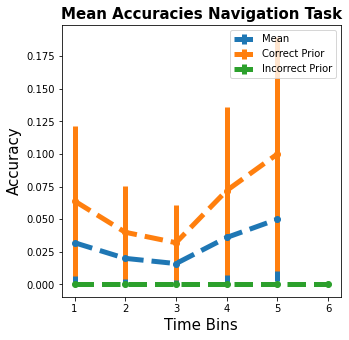

In [118]:
## plot diff between conditions over time
X_axis_t = np.arange(0,len(sess_split_t))

plt.rcParams['figure.figsize'] = [5, 5]

data = mean_nav
se = np.divide(np.std(data,0),np.sqrt(np.size(data,0)))
plt.errorbar(X_axis_t, np.mean(data,0), yerr=se, 
             linewidth=5, fmt='o--', label = "Mean")

data = mean_nav[:5,:]
se = np.divide(np.std(data,0),np.sqrt(np.size(data,0)))
plt.errorbar(X_axis_t, np.mean(data,0), yerr=se, 
             linewidth=5, fmt='o--', label = "Correct Prior")

data = mean_nav[5:,:]
se = np.divide(np.std(data,0),np.sqrt(np.size(data,0)))
plt.errorbar(X_axis_t, np.mean(data,0), yerr=se, 
             linewidth=5, fmt='o--', label = "Incorrect Prior")


plt.xticks(X_axis_t, np.arange(1,n_split+1))
plt.xlabel("Time Bins", fontsize=15)
plt.ylabel("Accuracy", fontsize=15)
plt.legend(bbox_to_anchor=(1, 1))
plt.title("Mean Accuracies Navigation Task", fontsize=15, fontweight="bold")
plt.show()

In [97]:
np.size(ident,0)

6

# Pre-processing

#### Cleaning trial_df for selected ids

The silhouette_id of some session_ids had additional string in them, this code block removes those

In [423]:
silhouette_df["silhouette_id"].unique()
# trial type = 2

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179], d

In [22]:
# Notice the difference in silhouette id

trial_df[trial_df['trial_id'].isin((1,30386))]

,trial_id,session_id,silhouette_id,time_stamp,reward,timeout,experiment_part,trial_type
0,1,1,149,1636029597122,0,0.0,NaN,NaN
30385,30386,1195,RelGraphsStimSet0_0,1661243833672,1,0.0,0.0,2.0


In [23]:
# Identify session_ids of concern

# all are trained on the same adjacency matrix, 2 groups tested on different underlying matrix in the navigation task
# mine: 1171
# correct prior: [1195,1197,1199,1203,1204]
# incorrect prior: [1210,1211,1214,1215,1223]

# selected ids we're concerned with
session_ids = [1195,1197,1199,1203,1204,1210,1211,1214,1215,1223]
#session_ids = [1195]
#session_ids = [1199, 1203,1204,1210,1211,1214,1215,1223]


In [24]:
trial_copy_selected_ids = trial_df.query(f'session_id in {session_ids}').copy()

cleaned_sil_id_array = []

for i in np.arange(len(trial_copy_selected_ids)):
    text = trial_copy_selected_ids.iloc[i, 2] # the entry in the silhouette_id column, this is a string
    sil_id_str = re.split("_", text) # split the string at _, now I have a list of len 2
    sil_id =  int(sil_id_str[1]) # extracting relevant info; correspond to actual silhouette id, convert to int
    cleaned_sil_id_array.append(sil_id) # the append is ordered
    
# Now I have a list, I can just add this to a new column in the dataframe

trial_copy_selected_ids["silhouette_id"] = cleaned_sil_id_array # changing the silhouette id column

print(trial_copy_selected_ids.iloc[:,1].unique())
trial_copy_selected_ids.head()

[1195 1197 1199 1203 1204 1210 1211 1214 1215 1223]


,trial_id,session_id,silhouette_id,time_stamp,reward,timeout,experiment_part,trial_type
30385,30386,1195,0,1661243833672,1,0.0,0.0,2.0
30386,30387,1195,1,1661243845177,1,0.0,0.0,2.0
30387,30388,1195,2,1661243854843,1,0.0,0.0,2.0
30388,30389,1195,3,1661243867417,1,0.0,0.0,2.0
30389,30390,1195,4,1661243875753,0,0.0,0.0,2.0


#### Modified the silhouette data

The silhouette data here is from Solutions.csv which contains the correct connections of the building blocks in each silhouette trial.<br>
I just added a column which collects the building blocks in a list. Consecutive elements in the list are connected.<br>
<br>
I also added a silhouette_id column

In [25]:
# loading the silhouette solutions (in an ordered way) for the current ground truth adjacency (for ids:[1171, 1195,1197,1199,1203,1204]) 

solution_array_current = pd.read_csv(f"C:\\Users\\kmedriano\\Documents\\Cactus\\data\\Solutions.csv")
solution_array_current['silhouette_id'] = np.arange(150) # so I could merge easily

block_list = []  # list of the blocks, so I could use the current function that I have
for i in np.arange(150):
    b1 = int(solution_array_current.iloc[i,0])
    b2 = int(solution_array_current.iloc[i,1])
    b3 = int(solution_array_current.iloc[i,2])
    b4 = int(solution_array_current.iloc[i,3])
    l = [b1,b2,b3,b4]
    block_list.append(l)

solution_array_current["block_connect_list"] = block_list
solution_array_current.head()

,Block 1,Block 2,Block 3,Block 4,silhouette_id,block_connect_list
0,0,5,2,1,0,"[0, 5, 2, 1]"
1,1,3,2,5,1,"[1, 3, 2, 5]"
2,4,5,2,3,2,"[4, 5, 2, 3]"
3,0,4,5,2,3,"[0, 4, 5, 2]"
4,0,5,2,1,4,"[0, 5, 2, 1]"


Below code block is irrelevant for now, but I am maintaining it in case there is a need fo rit next time. The code block parses the solution column <br>
of the solution_df then collects in an ordered list the building block ids specified. Each list is stored in a new column called solution_array. <br>

In [26]:
# # Cleaning silhouette dataframe: changing the solution column from a string to an ordered list (like solution array)
# # I need something that would parse something of this type: [{"x":3, "y":4, "id":0},{"x":5, "y":3, "id":1},{"x":2, "y":5, "id":3},{"x":5, "y":4, "id":5}]

# # filter: "id":%}   where % is a placeholder for any number
# # extract the number in ordered sequence

# solution_array = []

# for i in np.arange(len(silhouette_df_copy)):
#     solution_str = silhouette_df_copy.iloc[i, 1] # the entry in the solution column
#     digits = re.findall('\d',solution_str) # get all digits
#     bb_digits = digits[2:12:3] # return only those digits that correspond to actual bb indices, it will actually return a list
#     solution_array.append(bb_digits) # the append is ordered
    
# # Now I have a list, I can just add this to a new column in the dataframe

# silhouette_df_copy["solution_array"] = solution_array
# silhouette_df_copy.head()

#### Joining relevant dataframes

Now I want to join: <br>
<br>
trial_copy_selected_ids - contains the trial data of the session_ids of concern <br>
<br>
solution_array_current - contains the correct connections of the building blocks in the silhouettes

In [420]:
trial_copy_selected_ids

,trial_id,session_id,silhouette_id,time_stamp,reward,timeout,experiment_part,trial_type
30385,30386,1195,0,1661243833672,1,0.0,0.0,2.0
30386,30387,1195,1,1661243845177,1,0.0,0.0,2.0
30387,30388,1195,2,1661243854843,1,0.0,0.0,2.0
30388,30389,1195,3,1661243867417,1,0.0,0.0,2.0
30389,30390,1195,4,1661243875753,0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...
32259,32260,1223,145,1661347625997,1,0.0,2.0,2.0
32260,32261,1223,146,1661347641037,1,0.0,2.0,2.0
32261,32262,1223,147,1661347649927,1,0.0,2.0,2.0
32262,32263,1223,148,1661347657428,1,0.0,2.0,2.0


In [27]:
merged_selected_ids = pd.merge(trial_copy_selected_ids,solution_array_current, on='silhouette_id')
merged_selected_ids.head()

,trial_id,session_id,silhouette_id,time_stamp,reward,timeout,experiment_part,trial_type,Block 1,Block 2,Block 3,Block 4,block_connect_list
0,30386,1195,0,1661243833672,1,0.0,0.0,2.0,0,5,2,1,"[0, 5, 2, 1]"
1,30423,1197,0,1661244248919,1,0.0,0.0,2.0,0,5,2,1,"[0, 5, 2, 1]"
2,30460,1199,0,1661244472463,0,0.0,0.0,2.0,0,5,2,1,"[0, 5, 2, 1]"
3,30660,1203,0,1661245476938,0,NaN,0.0,2.0,0,5,2,1,"[0, 5, 2, 1]"
4,30986,1204,0,1661251916638,1,0.0,0.0,2.0,0,5,2,1,"[0, 5, 2, 1]"


In [ ]:
trial_merged_selected_ids = pd.merge(trial_copy_selected_ids,solution_array_current, on='silhouette_id')
trial_merged_selected_ids.head()

# Analysis

### Summed response times for each silhouette

This checks the summed RT for each silhouette of all participants.

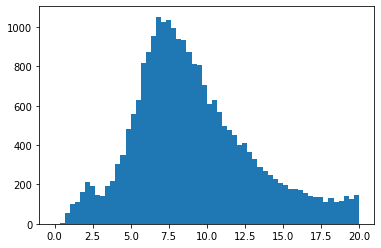

In [28]:
col = ["trial_id","reaction_time"]

sliced_action_df = action_df[col]
trial_grouped = sliced_action_df.groupby("trial_id")

# grouped by
d2 = trial_grouped["reaction_time"].sum().to_frame(name="reaction_time").reset_index()

# removing RT > 20
valid_RT = d2.loc[(d2["reaction_time"]<=20) & (d2["reaction_time"]>=0)]

# valid_RT
rt = valid_RT["reaction_time"]

# histogram of summed response times
rt_array = np.array(rt)
plt.hist(rt_array,bins=60, range=(0,20))
plt.show()

### Additional data preprocessing for setting up the GLM

In [29]:
# get trial_ids of the session_ids of concern

trial_ids = merged_selected_ids[merged_selected_ids['session_id'].isin(session_ids)].loc[:,'trial_id'] # get all relevant trial id
trial_ids = np.array(trial_ids)

In [30]:
# selecting the action_df date for the relevant trial_ids/session_ids

action_selected_ids = action_df[action_df['trial_id'].isin(trial_ids)]

# slicing relevant columns in trial_df

col = ["trial_id","reaction_time"]

action_selected_ids = action_selected_ids[col]
action_selected_ids.head()

,trial_id,reaction_time
90158,30386,2.564
90159,30386,2.661
90160,30386,3.639
90161,30386,1.777
90162,30387,2.632


In [31]:
# grouped by trial_id, summing the reaction times
action_selected_ids_grouped = action_selected_ids.groupby("trial_id")
action_selected_ids_summedRT = action_selected_ids_grouped["reaction_time"].sum().to_frame(name="summed_rt").reset_index()
print(action_selected_ids_summedRT.shape)
action_selected_ids_summedRT.head() 

(1489, 2)


,trial_id,summed_rt
0,30386,10.641
1,30387,8.778
2,30388,11.810
3,30389,7.613
4,30390,11.589


In [32]:
# I actually also want to merge my df to actions, so I have reaction time data

merged_selected_ids_w_actions = pd.merge(action_selected_ids_summedRT, merged_selected_ids, on='trial_id')

# Filter those rewarded 
merged_selected_ids_w_actions = merged_selected_ids_w_actions[merged_selected_ids_w_actions.reward == 1]
merged_selected_ids_w_actions.head()

,trial_id,summed_rt,session_id,silhouette_id,time_stamp,reward,timeout,experiment_part,trial_type,Block 1,Block 2,Block 3,Block 4,block_connect_list
0,30386,10.641,1195,0,1661243833672,1,0.0,0.0,2.0,0,5,2,1,"[0, 5, 2, 1]"
1,30387,8.778,1195,1,1661243845177,1,0.0,0.0,2.0,1,3,2,5,"[1, 3, 2, 5]"
2,30388,11.810,1195,2,1661243854843,1,0.0,0.0,2.0,4,5,2,3,"[4, 5, 2, 3]"
3,30389,7.613,1195,3,1661243867417,1,0.0,0.0,2.0,0,4,5,2,"[0, 4, 5, 2]"
5,30391,9.633,1195,5,1661243888026,1,0.0,0.0,2.0,4,5,2,3,"[4, 5, 2, 3]"


### Pickle 

In [391]:
import pickle

In [396]:
pickle_in = open(f"C:\\Users\\kmedriano\\Documents\\Cactus\\tests\\learned_adjacency\\dict_co_occurence.pickle","rb")


#C:\Users\kmedriano\Documents\Cactus\tests\learned_adjacency\dict_co_occurence.pickle
dict_co_occurence_posterior = pickle.load(pickle_in)

EOFError: Ran out of input

### Model

In [397]:
# Load data

final_Sil = np.load(f"C:\\Users\\kmedriano\\Documents\\Cactus\\tests\\silhouettes\\final_Sil20220803-104805.npy")
solutions = np.load(f"C:\\Users\\kmedriano\\Documents\\Cactus\\tests\\silhouettes\\solutions_20220803-104805.npy")
coord_Blocks = np.load(f"C:\\Users\\kmedriano\\Documents\\Cactus\\tests\\silhouettes\\coord_Blocks_20220803-104805.npy")
adjacency = np.load(f"C:\\Users\\kmedriano\\Documents\\Cactus\\tests\\adjacency\\Adjacency_20220803-104805.npy")

# Model 1: co_occurence_model

def co_occurence_model(solution_array, 
                       t=150,
                       alpha=0.1, 
                       n_prim=6):

    """
    Learn the adjacency matrix using observed frequencies of chunks in the solutions array. 
    Update after every observation 

    Model parameter/s:
    alpha: learning rate, should be within [0,1] 

    1. First they start with uniform probabilities
    2. Then the agent starts observing one trial/silhouette at a time
    3. At each set of observation, the probabilities are recalculated
    4. The computation ends either after observing all "silhouettes" or by some number of trials
    """

    # Input
    # solution_array: (a matrix of n_sils x n_blocks) 
    # prior: (a matrix of n_prim x n_prim)
    # alpha: (scalar) learning rate
    # n_prim: (scalar) the number of primitive building blocks
    # t: (scalar) number of observations to learn

    # Output
    # posterior: (matrix of n_prim x n_prim dimensions)

    # Initialization:

    # Dictionary to keep trial by trial posterior

    posterior_dict = {}

    # a check that alpha in [0,1]

    # if no prior is provided
    prior = np.ones((n_prim,n_prim), float)*(12/math.comb(6,4))
    np.fill_diagonal(prior,0)

    # do not exhaust all stimulus/silhouettes, just learn from t-silhouettes
    solution_array = solution_array[:t,:]

    for sil in np.arange(solution_array.shape[0]):
        # posterior
        posterior = prior

        # list of pairs of blocks in a silhouette
        tuple_list = list(combinations(solution_array[sil],2)) #2 since we're concerned with chunks composed of 2 blocks, list of tuples

        for i in np.arange(n_prim):
            for j in np.arange(n_prim):
                if (i,j) in tuple_list:
                    posterior[i,j] = posterior[i,j] + alpha*(1-posterior[i,j]) 
                    posterior[j,i] = posterior[j,i] + alpha*(1-posterior[j,i]) # they should have similar values, since this is supposed to be symmetric
                else:
                    posterior[i,j] = posterior[i,j] - alpha*posterior[i,j] # maybe move back to uniform prior rather than 0? ; meeting with Philipp
                    posterior[j,i] = posterior[j,i] - alpha*posterior[j,i] # they should have similar values, since this is supposed to be symmetric

        posterior_dict[f"{sil}"] = posterior
        prior = posterior

    return posterior_dict

posterior_co_occurence = co_occurence_model(solutions)

In [401]:
# Model 2: connectivity_model

def connectivity_model(solution_array, 
                       alpha=0.1, 
                       n_prim=6, 
                       t=150):

    """
    Learn the adjacency matrix using observed frequencies of connected chunks in the solutions array. 
    Update after every observation 

    Model parameter/s:
    alpha: learning rate, should be within [0,1] 

    1. First they start with uniform probabilities
    2. Then the agent starts observing one trial/silhouette at a time
    3. At each set of observation, the probabilities are recalculated
    4. The computation ends either after observing all "silhouettes" or by some number of trials
    """

    # Input
    # solution_array: (a matrix of n_sils x n_blocks) 
    # prior: (a matrix of n_prim x n_prim)
    # alpha: (scalar) learning rate
    # n_prim: (scalar) the number of primitive building blocks
    # t: (scalar) number of observations to learn

    # Output
    # posterior: (matrix of n_prim x n_prim dimensions)

    # Initialization:

    # Dictionary to keep trial by trial posterior

    posterior_dict = {}

    # a check that alpha in [0,1]

    # if no prior is provided
    prior = np.ones((n_prim,n_prim), float)*(12/math.comb(6,4))
    np.fill_diagonal(prior,0)

    # do not exhaust all stimulus/silhouettes, just learn from t-silhouettes
    solution_array = solution_array[:t,:]

    for sil in np.arange(solution_array.shape[0]):

        # posterior
        posterior = prior

        # collect the pairs of connected blocks in the silhouette
        # this is a dictionary, the keys are tuples (pairs) of the connected blocks present in the silhouette
        # while the values are the number of their occurence, I only need to access the keys
        tuple_dict = tuple_counter(solution_array[sil]) # collects the tuple per row/observation

        for i in np.arange(n_prim):
            for j in np.arange(n_prim):
                if (i,j) in tuple_dict.keys():
                    posterior[i,j] = posterior[i,j] + alpha*(1-posterior[i,j]) # if the connection is observed, move closer to 1
                    posterior[j,i] = posterior[j,i] + alpha*(1-posterior[j,i]) # they should have similar values, since this is supposed to be symmetric
                else:
                    posterior[i,j] = posterior[i,j] - alpha*posterior[i,j] # if not, more closer to 0, 
                                                                           # maybe move back to uniform prior rather than 0? ; meeting with Philipp
                                                                           # this just asks, should the prior be a lower bound? idts 
                    posterior[j,i] = posterior[j,i] - alpha*posterior[j,i] # they should have similar values, since this is supposed to be symmetric

        posterior_dict[f"{sil}"] = posterior
        prior = posterior

    return posterior_dict

posterior_connected = connectivity_model(solutions)

### GLM for the group

In [33]:
# Posterior/learned adjacency/co-occurence matrix

#posterior = np.load(f"C:\\Users\\kmedriano\\Documents\\Cactus\\tests\\learned_adjacency\\posterior_trial.npy")
posterior = np.load(f"C:\\Users\\kmedriano\\Documents\\Cactus\\tests\\learned_adjacency\\co_occurence_learned.npy")

# X

solution_array = np.array(merged_selected_ids_w_actions.iloc[:,-1]) # I want an array of lists, row = 900 (150*6)
array_size = solution_array.shape[0]

summed_log_prob_all = np.zeros(array_size)

for sil in np.arange(array_size):
    # list of pairs of blocks in a silhouette
    tuple_list = list(combinations(solution_array[sil],2)) #2 since we're concerned with chunks composed of 2 blocks, list of tuples
    for (i,j) in tuple_list:
        if posterior[i,j] != 0:
            summed_log_prob_all[sil] += np.log(posterior[i,j]) # this will most likely be a negative number

summed_log_prob_all = summed_log_prob_all.reshape(-1,1) # this summed log predicts similar value for each silhouette

# RT

# get it from merged_selected_ids_w_actions the summed_rt_all column 

summed_rt_all = np.array(merged_selected_ids_w_actions.loc[:,'summed_rt'])
summed_rt_all = summed_rt_all.reshape(-1,1)

# RT scaling using "RT = b_0 + b_1*X where b_0 and b_1 are parameters and X is the summed log probabilities"
# I want a value for b_0 and b_1

reg = LinearRegression().fit(summed_log_prob_all,summed_rt_all)

print(reg.score(summed_log_prob_all, summed_rt_all))
print(reg.coef_)
print(reg.intercept_)

0.0023830128982151866
[[-0.02405729]]
[9.62684248]


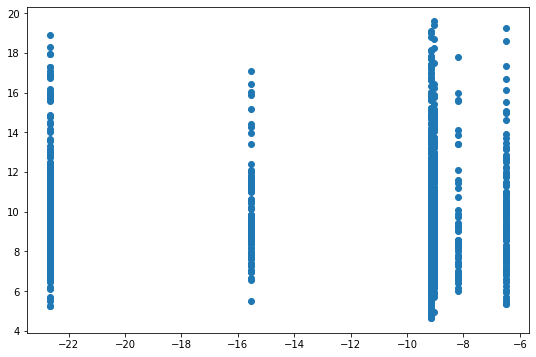

In [47]:
plt.figure(figsize=(9,6))
plt.scatter(summed_log_prob_all, summed_rt_all)
plt.show()

### GLM per participant

In [404]:
merged_selected_ids_w_actions.head()

,trial_id,summed_rt,session_id,silhouette_id,time_stamp,reward,timeout,experiment_part,trial_type,Block 1,Block 2,Block 3,Block 4,block_connect_list
0,30386,10.641,1195,0,1661243833672,1,0.0,0.0,2.0,0,5,2,1,"[0, 5, 2, 1]"
1,30387,8.778,1195,1,1661243845177,1,0.0,0.0,2.0,1,3,2,5,"[1, 3, 2, 5]"
2,30388,11.810,1195,2,1661243854843,1,0.0,0.0,2.0,4,5,2,3,"[4, 5, 2, 3]"
3,30389,7.613,1195,3,1661243867417,1,0.0,0.0,2.0,0,4,5,2,"[0, 4, 5, 2]"
5,30391,9.633,1195,5,1661243888026,1,0.0,0.0,2.0,4,5,2,3,"[4, 5, 2, 3]"


array([[ 1.19500000e+03, -2.33049383e-02,  9.05924770e+00],
       [ 1.19700000e+03, -2.25176124e-02,  1.09870394e+01],
       [ 1.19900000e+03,  1.58603278e-02,  9.66411715e+00],
       [ 1.20300000e+03, -8.25076741e-02,  1.14251755e+01],
       [ 1.20400000e+03, -5.89763157e-02,  7.45845829e+00],
       [ 1.21000000e+03, -4.93916955e-03,  9.37677053e+00],
       [ 1.21100000e+03, -3.25810265e-02,  1.00965262e+01],
       [ 1.21400000e+03,  3.02817278e-02,  9.89454711e+00],
       [ 1.21500000e+03, -4.40601273e-02,  9.36461814e+00],
       [ 1.22300000e+03,  5.13521404e-03,  9.67869869e+00]])

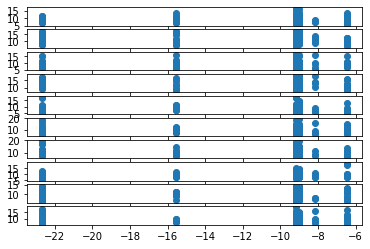

In [35]:
# Posterior/learned adjacency/co-occurence matrix

#posterior = np.load(f"C:\\Users\\kmedriano\\Documents\\Cactus\\tests\\learned_adjacency\\posterior_trial.npy")
posterior = np.load(f"C:\\Users\\kmedriano\\Documents\\Cactus\\tests\\learned_adjacency\\co_occurence_learned.npy")

# Per participant

indiv_param = [] # param holder

fig, ax = plt.subplots(len(session_ids)) # creating histogram subplot for each participant

for k in session_ids:
    session_id_data = merged_selected_ids_w_actions[merged_selected_ids_w_actions.session_id == k] # slice the relevant data for session_id

    # X: summed log probabilities from the learned adjacency matrix: posterior
    solution_array = np.array(session_id_data.loc[:,'block_connect_list']) 
    array_size = solution_array.shape[0]

    summed_log_prob = np.zeros(array_size)

    for sil in np.arange(array_size):
        # list of pairs of blocks in a silhouette
        tuple_list = list(combinations(solution_array[sil],2)) #2 since we're concerned with chunks composed of 2 blocks, list of tuples
        for (i,j) in tuple_list:
            if posterior[i,j] != 0:
                summed_log_prob[sil] += np.log(posterior[i,j]) # this will most likely be a negative number

    summed_log_prob = summed_log_prob.reshape(-1,1) # this summed log predicts similar value for each silhouette

    # RT: get it from session_id_data summed_rt column 

    summed_rt = np.array(session_id_data.loc[:,'summed_rt'])
    summed_rt = summed_rt.reshape(-1,1)

    # Plot

    idx = session_ids.index(k)
    ax[idx].scatter(summed_log_prob, summed_rt)

    # RT scaling using "RT = b_0 + b_1*X where b_0 and b_1 are parameters and X is the summed log probabilities"
    # I want a value for b_0 and b_1

    reg = LinearRegression().fit(summed_log_prob,summed_rt)
    param = [k, reg.coef_[0][0], reg.intercept_[0]]

    indiv_param.append(param)

indiv_param = np.array(indiv_param)

indiv_param

In [436]:
a = np.arange(4)
a = a.reshape((2,2))
b = np.ones((2,2))*2

print(a)
print(b)

[[0 1]
 [2 3]]
[[2. 2.]
 [2. 2.]]


In [433]:
a*b

array([[0., 2.],
       [4., 6.]])

In [437]:
c = np.fill_diagonal(b,0)

print(b)
print(c)

[[0. 2.]
 [2. 0.]]
None


: 

In [36]:
# Coefficient check, is the mean coefficient significantly different from 0

coeffs = indiv_param[:,1]

# one sample t-test

print(stats.ttest_1samp(coeffs, 0))

Ttest_1sampResult(statistic=-1.9844187367639754, pvalue=0.07849912320859967)


### GLM per individual with additional regressor

Regressors: summed log prob of co-occuring chunks and summed log prob of connected chunks, both from the co-occurence matrix

In [37]:
session_ids = [1195,1197,1199,1203,1204,1210,1211,1214,1215,1223]

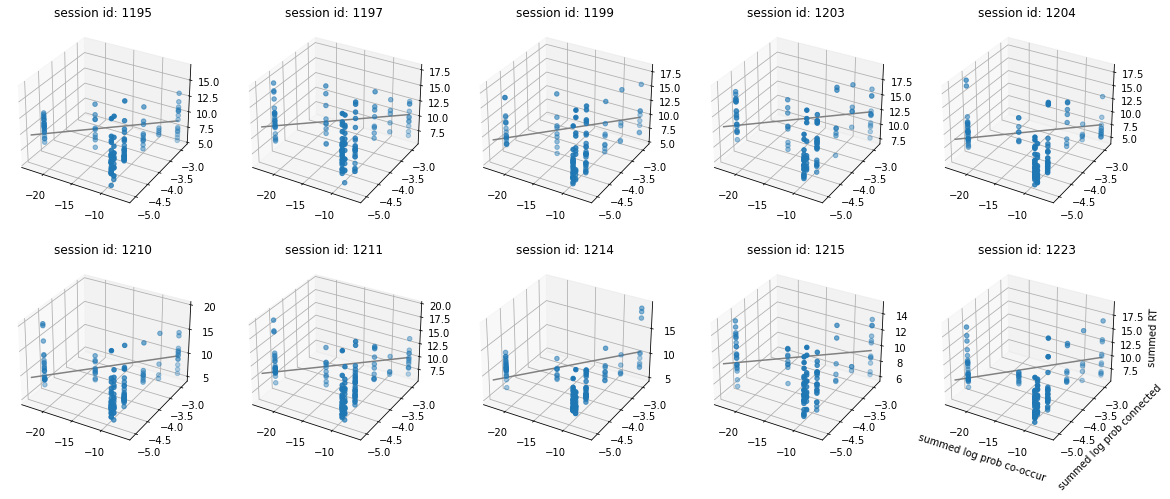

array([[ 1.19500000e+03, -1.40613697e-02, -3.26368345e-01,
         7.72905459e+00],
       [ 1.19700000e+03, -1.14953940e-02, -4.73940396e-01,
         9.02001463e+00],
       [ 1.19900000e+03,  1.37830471e-02,  1.01633083e-01,
         1.00913695e+01],
       [ 1.20300000e+03, -9.25613900e-02,  3.00835775e-01,
         1.26133214e+01],
       [ 1.20400000e+03, -5.72412057e-02, -6.70709682e-02,
         7.18225709e+00],
       [ 1.21000000e+03, -1.01331804e-02,  2.10584112e-01,
         1.02486010e+01],
       [ 1.21100000e+03, -2.90303052e-02, -1.48353555e-01,
         9.48124132e+00],
       [ 1.21400000e+03,  1.56292071e-02,  6.25154378e-01,
         1.24864495e+01],
       [ 1.21500000e+03, -4.23064513e-02, -7.25121421e-02,
         9.06414495e+00],
       [ 1.22300000e+03,  1.04870829e-03,  2.05356556e-01,
         1.05453284e+01]])

In [39]:
# Posterior/learned adjacency/co-occurence matrix

#posterior = np.load(f"C:\\Users\\kmedriano\\Documents\\Cactus\\tests\\learned_adjacency\\posterior_trial.npy")
posterior = np.load(f"C:\\Users\\kmedriano\\Documents\\Cactus\\tests\\learned_adjacency\\co_occurence_learned.npy")


# Per participant
indiv_param = [] # param holder

# For plotting 
fig = plt.figure(figsize=[20,8])

for idx, k in enumerate(session_ids):
    session_id_data = merged_selected_ids_w_actions[merged_selected_ids_w_actions.session_id == k] # slice the relevant data for session_id

    # X: summed log probabilities from the learned adjacency matrix: posterior
    solution_array = np.array(session_id_data.loc[:,'block_connect_list']) 
    array_size = solution_array.shape[0]

    summed_log_prob_connected = np.zeros(array_size)
    summed_log_prob_co_occur = np.zeros(array_size)

    for sil in np.arange(array_size):
        # list of pairs (tuple) of blocks in a silhouette
        tuple_list_co_occur = list(combinations(solution_array[sil],2)) #2 since we're concerned with chunks composed of 2 blocks, list of tuples
        
        # only the actually connected blocks in the silhouette
        tuple_dict = tuple_counter(solution_array[sil])
        tuple_list_connected = tuple_dict.keys()

        for (i,j) in tuple_list_co_occur:
            if posterior[i,j] != 0:
                summed_log_prob_co_occur[sil] += np.log(posterior[i,j]) # this will most likely be a negative number
            
        for (i,j) in tuple_list_connected:
            if posterior[i,j] != 0:
                summed_log_prob_connected[sil] += np.log(posterior[i,j]) # this will most likely be a negative number
        

    summed_log_prob_co_occur = summed_log_prob_co_occur.reshape(-1,1) # this summed log predicts similar value for each silhouette
    summed_log_prob_connected = summed_log_prob_connected.reshape(-1,1) # this summed log predicts similar value for each silhouette
    
    summed_log_prob = np.array([summed_log_prob_co_occur, summed_log_prob_connected])
    summed_log_prob = np.squeeze(summed_log_prob.T)


    # RT: get it from session_id_data summed_rt column 

    summed_rt = np.array(session_id_data.loc[:,'summed_rt'])
    summed_rt = summed_rt.reshape(-1,1)

    # Regression

    # RT scaling using "RT = b_0 + b_1*X where b_0 and b_1 are parameters and X is the summed log probabilities"
    # I want a value for b_0 and b_1

    reg = LinearRegression().fit(summed_log_prob,summed_rt)
    param = [k, reg.coef_[0][0], reg.coef_[0][1], reg.intercept_[0]]

    indiv_param.append(param)

    # Plot
    ax = fig.add_subplot(2, 5, idx+1, projection='3d')

    # scatter
    rt = summed_rt
    co_occur_data = summed_log_prob[:,0]
    connected_data = summed_log_prob[:,1]
    ax.scatter(co_occur_data, connected_data, rt)

    # plot surface/line
    min_co_occur = min(summed_log_prob[:,0])
    max_co_occur = max(summed_log_prob[:,0])

    min_connected = min(summed_log_prob[:,1])
    max_connected = max(summed_log_prob[:,1])

    co_occur_lin = np.linspace(min_co_occur, max_co_occur, num=50) #co_occur
    connected_lin = np.linspace(min_connected, max_connected, num=50) #connected
    X_pred = np.array([co_occur_lin,connected_lin])
    X_pred = np.squeeze(X_pred.T)
    rt_pred = reg.predict(X_pred)
    ax.plot3D(co_occur_lin, connected_lin, np.squeeze(rt_pred), 'gray')

    ax.set_title(f'session id: {k}')

ax.set_xlabel('summed log prob co-occur')
ax.set_ylabel('summed log prob connected')
ax.set_zlabel('summed RT')
    
plt.show()
indiv_param = np.array(indiv_param)

indiv_param


In [40]:
# Coefficient check

coeffs_co_occur = indiv_param[:,1]
coeffs_connected = indiv_param[:,2]

print(stats.ttest_1samp(coeffs_co_occur, 0))
print(stats.ttest_1samp(coeffs_connected, 0))

Ttest_1sampResult(statistic=-2.124238043673949, pvalue=0.06260500603822433)
Ttest_1sampResult(statistic=0.3498336548868379, pvalue=0.734510463945896)


### GLM per individual with additional regressor 

Regressors: summed log prob of co-occuring chunks from the co-occurence matrix and summed log prob of connected chunks from the connectedness matrix

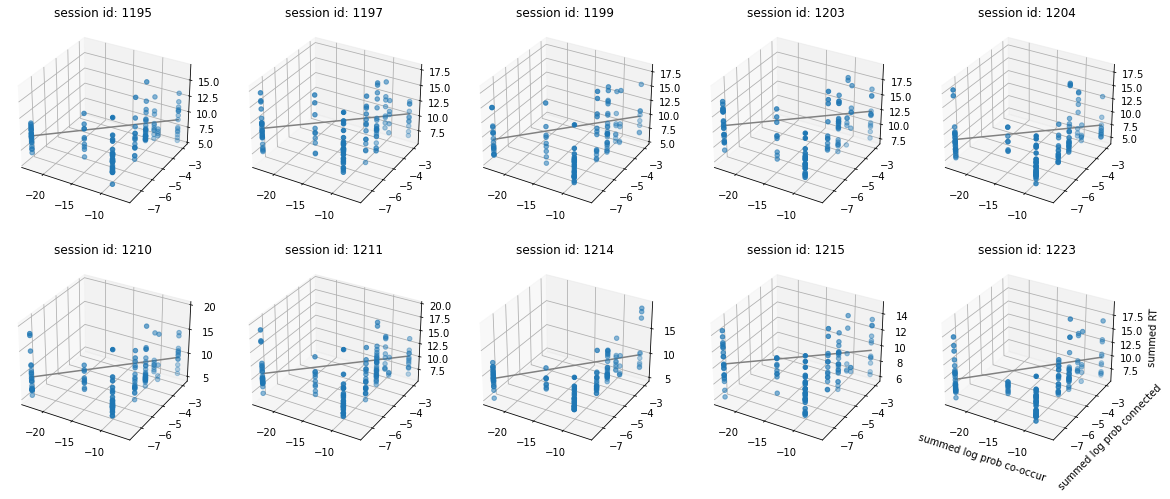

array([[ 1.19500000e+03,  5.61312550e-03, -1.46989210e-01,
         8.54782181e+00],
       [ 1.19700000e+03,  2.93054985e-02, -2.77765142e-01,
         9.97203391e+00],
       [ 1.19900000e+03, -1.99190730e-02,  1.87174922e-01,
         1.03287629e+01],
       [ 1.20300000e+03, -1.41594809e-01,  2.87199694e-01,
         1.23602384e+01],
       [ 1.20400000e+03, -4.23781878e-02, -8.62246136e-02,
         7.15476392e+00],
       [ 1.21000000e+03, -2.61902120e-03, -1.18566388e-02,
         9.33554165e+00],
       [ 1.21100000e+03, -4.01302655e-02,  3.84961816e-02,
         1.02291275e+01],
       [ 1.21400000e+03, -1.82376862e-03,  1.64156447e-01,
         1.04566452e+01],
       [ 1.21500000e+03, -3.66260861e-02, -3.93170623e-02,
         9.22189186e+00],
       [ 1.22300000e+03, -2.58393950e-02,  1.67675995e-01,
         1.02950755e+01]])

In [42]:
# Posterior/learned adjacency/co-occurence matrix

posterior_co_occurence = np.load(f"C:\\Users\\kmedriano\\Documents\\Cactus\\tests\\learned_adjacency\\co_occurence_learned.npy")
posterior_connected = np.load(f"C:\\Users\\kmedriano\\Documents\\Cactus\\tests\\learned_adjacency\\connected_learned.npy")

# Per participant

indiv_param = [] # param holder

# For plotting
fig = plt.figure(figsize=[20,8])

for idx, k in enumerate(session_ids):
    session_id_data = merged_selected_ids_w_actions[merged_selected_ids_w_actions.session_id == k] # slice the relevant data for session_id

    # X: summed log probabilities from the learned adjacency matrix: posterior
    solution_array = np.array(session_id_data.loc[:,'block_connect_list']) 
    array_size = solution_array.shape[0]

    summed_log_prob_connected = np.zeros(array_size)
    summed_log_prob_co_occur = np.zeros(array_size)

    for sil in np.arange(array_size):
        # list of pairs (tuple) of blocks in a silhouette
        tuple_list_co_occur = list(combinations(solution_array[sil],2)) #2 since we're concerned with chunks composed of 2 blocks, list of tuples
        
        # only the actually connected blocks in the silhouette
        tuple_dict = tuple_counter(solution_array[sil])
        tuple_list_connected = tuple_dict.keys()

        for (i,j) in tuple_list_co_occur:
            if posterior[i,j] != 0:
                summed_log_prob_co_occur[sil] += np.log(posterior_co_occurence[i,j]) # this will most likely be a negative number

        for (i,j) in tuple_list_connected:
            if posterior[i,j] != 0:
                summed_log_prob_connected[sil] += np.log(posterior_connected[i,j]) # this will most likely be a negative number

    summed_log_prob_co_occur = summed_log_prob_co_occur.reshape(-1,1) # this summed log predicts similar value for each silhouette
    summed_log_prob_connected = summed_log_prob_connected.reshape(-1,1) # this summed log predicts similar value for each silhouette
    
    summed_log_prob = np.array([summed_log_prob_co_occur, summed_log_prob_connected])
    summed_log_prob = np.squeeze(summed_log_prob.T)

    # RT: get it from session_id_data summed_rt column 

    summed_rt = np.array(session_id_data.loc[:,'summed_rt'])
    summed_rt = summed_rt.reshape(-1,1)

    # Regression

    # RT scaling using "RT = b_0 + b_1*X where b_0 and b_1 are parameters and X is the summed log probabilities"
    # I want a value for b_0 and b_1

    reg = LinearRegression().fit(summed_log_prob,summed_rt)
    param = [k, reg.coef_[0][0], reg.coef_[0][1], reg.intercept_[0]]

    indiv_param.append(param)

    # Plot
    ax = fig.add_subplot(2, 5, idx+1, projection='3d')

    # scatter
    rt = summed_rt
    co_occur_data = summed_log_prob[:,0]
    connected_data = summed_log_prob[:,1]
    ax.scatter(co_occur_data, connected_data, rt)

    # plot surface/line
    min_co_occur = min(summed_log_prob[:,0])
    max_co_occur = max(summed_log_prob[:,0])

    min_connected = min(summed_log_prob[:,1])
    max_connected = max(summed_log_prob[:,1])

    co_occur_lin = np.linspace(min_co_occur, max_co_occur, num=50) #co_occur
    connected_lin = np.linspace(min_connected, max_connected, num=50) #connected
    X_pred = np.array([co_occur_lin,connected_lin])
    X_pred = np.squeeze(X_pred.T)
    rt_pred = reg.predict(X_pred)
    ax.plot3D(co_occur_lin, connected_lin, np.squeeze(rt_pred), 'gray')

    ax.set_title(f'session id: {k}')

ax.set_xlabel('summed log prob co-occur')
ax.set_ylabel('summed log prob connected')
ax.set_zlabel('summed RT')

plt.show()
indiv_param = np.array(indiv_param)

indiv_param

In [ ]:
# Coefficient check

coeffs_co_occur = indiv_param[:,1]
coeffs_connected = indiv_param[:,2]

print(stats.ttest_1samp(coeffs_co_occur, 0))
print(stats.ttest_1samp(coeffs_connected, 0))

### Per building block RT

# Graph Similarity

To do

Graph Pipeline:
1. Identify other adjacency matrices, what I want to have is a set of adjacency matrices such that I have enough similarity scores (done)
2. Check the correlation of similarity scores between the different distance measures (display correlation matrix) (done)
3. Plot what I imagined

In [132]:
G_ground_truth = nx.from_numpy_array(ground_truth)

In [343]:
# Generate other adjancencies

def adjacency_mat_generator():
    "Generate random adjacency matrix, symmetric with at least 4 elements with 1 as entry"

    adjacency = np.zeros((6,6))

    possible_edges = [1,2,3,4,5,8,9,10,11,15,16,17,22,23,29] # in the upper triangular
    #edge_number = np.random.choice(np.arange(7,16),1) # we allow at least 4 edges                                              
    edge_number = 7 # for generating adjacencies I will give to Philipp
    edges = np.random.choice(possible_edges, edge_number, replace=False) # without replacement
    edges = np.unravel_index(edges, (6,6))

    adjacency[edges] = 1
    adjacency = adjacency + adjacency.T # since should be symmetric

    return adjacency

In [367]:
# Generating adjacencies I will give to Philipp

# Adjacency
adjacency_dict = {}
adjacency_dict['A_0'] = ground_truth

for i in np.arange(1,9): # 8 adjacencies
    adjacency_dict[f"A_{i}"] = adjacency_mat_generator()

adjacency_dict["A_9"] = opp

# Graphs
graph_dict = {}

for i in np.arange(len(adjacency_dict.keys())): # 12 graphs
    graph_dict[f"G_{i}"] = nx.from_numpy_array(adjacency_dict[f"A_{i}"])


In [368]:
len(graph_dict)

10

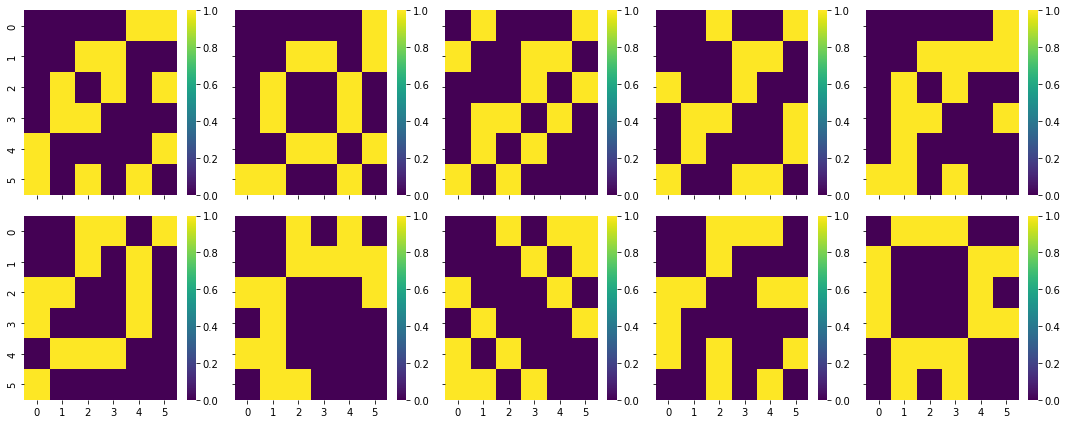

In [369]:
# Plot adjacencies (to give to Philipp)

fig,axn = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True, figsize=(15,6))

for i, ax in enumerate(axn.flat):
    sns.heatmap(adjacency_dict[f"A_{i}"], ax=ax,
                cmap='viridis')
    
plt.tight_layout()

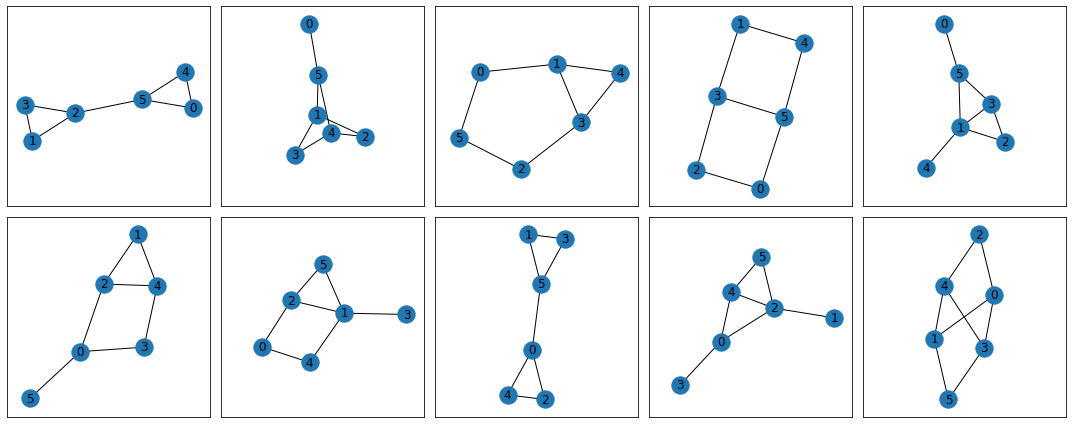

In [370]:
# Plot graph (to give to Philipp)

fig,axn = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True, figsize=(15,6))

for i, ax in enumerate(axn.flat):
    nx.draw_networkx(graph_dict[f"G_{i}"], ax=ax)
    
    #ax.set_title(f'sample title')

plt.tight_layout()

In [387]:
# Similarity score for the adjacencies I will give to Philipp

dist_measures = [netrd.distance.Hamming(),
                netrd.distance.HammingIpsenMikhailov(),
                netrd.distance.NetSimile(),
                netrd.distance.DeltaCon()]

distances_exp = np.zeros((len(graph_dict.keys()), len(dist_measures))) # will include the G_0 distance with itself

for i,graph_idx in enumerate(np.arange(distances_exp.shape[0])): # will include the G_0 distance with itself, that's why np.arange(0...) not np.arange(1)
    for j,measure in enumerate(dist_measures):
        dist = measure
        D = dist.dist(graph_dict["G_0"], graph_dict[f"G_{graph_idx}"])
        D = dist.results['dist']
        distances_exp[i,j] = D

graph = pd.Series([f"G_{i}" for i in np.arange(len(graph_dict.keys()))])
distances_exp_df = pd.DataFrame(distances_exp, columns = ['Hamming','HammingIpsenMikhailov','NetSimile','DeltaCon'])

distances_exp_df.insert(0, "Graph", graph)
distances_exp_df

<class 'networkx.utils.decorators.argmap'> compilation 16:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


,Graph,Hamming,HammingIpsenMikhailov,NetSimile,DeltaCon
0,G_0,0.000000,0.000000,0.000000e+00,0.000000
1,G_1,0.400000,0.290666,1.993007e+01,1.008409
2,G_2,0.400000,0.292887,1.022054e+01,1.211626
3,G_3,0.400000,0.292447,1.283838e+01,1.025088
4,G_4,0.400000,0.301383,1.375457e+01,1.084683
5,G_5,0.666667,0.476073,1.378691e+01,1.365537
6,G_6,0.400000,0.299622,1.481339e+01,1.023041
7,G_7,0.533333,0.377124,1.841893e-15,1.249051
8,G_8,0.400000,0.301383,1.375457e+01,1.113234
9,G_9,1.000000,0.710473,1.756275e+01,1.469556


In [388]:
distances_exp_df.sort_values(by=["DeltaCon"])

,Graph,Hamming,HammingIpsenMikhailov,NetSimile,DeltaCon
0,G_0,0.000000,0.000000,0.000000e+00,0.000000
1,G_1,0.400000,0.290666,1.993007e+01,1.008409
6,G_6,0.400000,0.299622,1.481339e+01,1.023041
3,G_3,0.400000,0.292447,1.283838e+01,1.025088
4,G_4,0.400000,0.301383,1.375457e+01,1.084683
8,G_8,0.400000,0.301383,1.375457e+01,1.113234
2,G_2,0.400000,0.292887,1.022054e+01,1.211626
7,G_7,0.533333,0.377124,1.841893e-15,1.249051
5,G_5,0.666667,0.476073,1.378691e+01,1.365537
9,G_9,1.000000,0.710473,1.756275e+01,1.469556


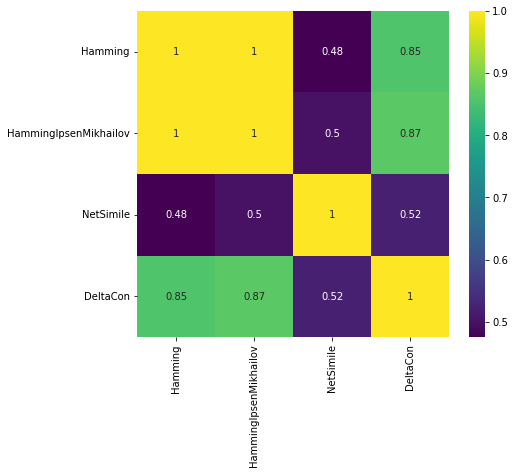

In [382]:
# Correlation among similarity measures (limited adjacencies)

sns.heatmap(distances_exp_df.corr(), cmap='viridis', annot=True)
plt.gcf().set_size_inches(7, 6)

In [419]:
group_mean = [G_0_mean,0,0,0,0,0,0,0,0,G_9_mean]


# sorted by DeltaCon ascending, 0 distance means more similar
distances_exp_df["group mean per graph"] = group_mean
distances_exp_df.sort_values(by=["DeltaCon"])

,Graph,Hamming,HammingIpsenMikhailov,NetSimile,DeltaCon,group mean per graph
0,G_0,0.000000,0.000000,0.000000e+00,0.000000,46.4
1,G_1,0.400000,0.290666,1.993007e+01,1.008409,0.0
6,G_6,0.400000,0.299622,1.481339e+01,1.023041,0.0
3,G_3,0.400000,0.292447,1.283838e+01,1.025088,0.0
4,G_4,0.400000,0.301383,1.375457e+01,1.084683,0.0
8,G_8,0.400000,0.301383,1.375457e+01,1.113234,0.0
2,G_2,0.400000,0.292887,1.022054e+01,1.211626,0.0
7,G_7,0.533333,0.377124,1.841893e-15,1.249051,0.0
5,G_5,0.666667,0.476073,1.378691e+01,1.365537,0.0
9,G_9,1.000000,0.710473,1.756275e+01,1.469556,21.4


### Correlation check

In [317]:
# Adjacencies for correlation of similarity scores

# Adjacency
adjacency_dict_corr = {}
adjacency_dict_corr['A_0'] = ground_truth

for i in np.arange(1,99): # 98 adjacencies
    adjacency_dict_corr[f"A_{i}"] = adjacency_mat_generator()

adjacency_dict_corr["A_99"] = opp


# Graphs
graph_dict_corr = {}

for i in np.arange(len(adjacency_dict_corr.keys())): # 12 graphs
    graph_dict_corr[f"G_{i}"] = nx.from_numpy_array(adjacency_dict_corr[f"A_{i}"])


In [322]:
# Checking the correlation of the distance measures

# G_0 to G_11

dist_measures = [netrd.distance.Hamming(),
                netrd.distance.HammingIpsenMikhailov(),
                netrd.distance.NetSimile(),
                netrd.distance.DeltaCon()]

In [346]:
# distances = np.zeros((len(graph_dict_corr.keys())-1, len(dist_measures))) # no. of graphs-1 (no. of distances) x no. of graph distance measures
distances = np.zeros((len(graph_dict_corr.keys()), len(dist_measures))) # will include the G_0 distance with itself

for i,graph_idx in enumerate(np.arange(0,distances.shape[0])): # will include the G_0 distance with itself, that's why np.arange(0...) not np.arange(1)
    for j,measure in enumerate(dist_measures):
        dist = measure
        D = dist.dist(graph_dict_corr["G_0"], graph_dict_corr[f"G_{graph_idx}"])
        D = dist.results['dist']
        distances[i,j] = D

distances_df = pd.DataFrame(distances, columns = ['Hamming','HammingIpsenMikhailov','NetSimile','DeltaCon'])

distances_df.head()

<class 'networkx.utils.decorators.argmap'> compilation 16:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


,Hamming,HammingIpsenMikhailov,NetSimile,DeltaCon
0,0.000000,0.000000,0.000000,0.000000
1,0.533333,0.520047,23.604101,1.855000
2,0.400000,0.301824,13.214466,1.124843
3,0.600000,0.434108,12.060418,1.417928
4,0.600000,0.475750,13.120320,1.293427


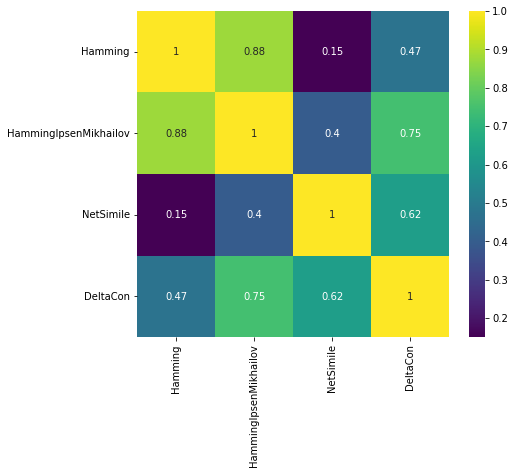

In [342]:
# Correlation among similarity measures

sns.heatmap(distances_df.corr(), cmap='viridis', annot=True)
plt.gcf().set_size_inches(7, 6)

# Navigation Data

To do:

1. Create a pipeline where I have a dataframe object with the first column showing the group mean score while the succeeding columns are the distance measures
2. Plot

In [261]:
ids = [1195,1197,1199,1203,1204,1210,1211,1214,1215,1223]
correct_prior = [1195,1197,1199,1203,1204]
incorrect_prior = [1210,1211,1214,1215,1223]

In [262]:
navigation_df.head()

,session_id,stim_left,stim_right,solution,selected,trial,show_length
0,1130,1,3,"4,0","4,0",0,NaN
1,1130,1,5,"4,3,0,2",4,1,NaN
2,1130,3,0,"4,1",2,2,NaN
3,1130,5,1,"0,2,3","5,2,1",3,NaN
4,1130,5,1,"3,0,2,4","1,0",4,NaN


In [269]:
trial_navigation_df = navigation_df[navigation_df['session_id'].isin(ids)]
trial_navigation_df.head()

,session_id,stim_left,stim_right,solution,selected,trial,show_length
523,1195,5,0,4,"3,1,2,4,5,0",0,1.0
524,1195,3,2,1,"0,1,2,3,4,5",1,1.0
525,1195,2,1,3,"0,5,3,4,1,2",2,1.0
526,1195,2,1,3,"5,0,1,2,3,4",3,1.0
527,1195,0,5,4,2,4,1.0


In [274]:
trial_navigation_df["correct"] = (trial_navigation_df["solution"] == trial_navigation_df["selected"])
trial_navigation_df = trial_navigation_df.astype({"correct": int})
trial_navigation_df.head()

,session_id,stim_left,stim_right,solution,selected,trial,show_length,correct
523,1195,5,0,4,"3,1,2,4,5,0",0,1.0,0
524,1195,3,2,1,"0,1,2,3,4,5",1,1.0,0
525,1195,2,1,3,"0,5,3,4,1,2",2,1.0,0
526,1195,2,1,3,"5,0,1,2,3,4",3,1.0,0
527,1195,0,5,4,2,4,1.0,0


In [284]:
# separating the 2 groups 

CP_navigation_df = trial_navigation_df[trial_navigation_df['session_id'].isin(correct_prior)][["session_id","correct"]]
IP_navigation_df = trial_navigation_df[trial_navigation_df['session_id'].isin(incorrect_prior)][["session_id","correct"]]

In [407]:
CP_grouped_session_id = CP_navigation_df.groupby("session_id")

# grouped by
CP_scores = CP_grouped_session_id["correct"].sum().to_frame(name="sum correct").reset_index()

CP_scores

,session_id,sum correct
0,1195,21
1,1197,49
2,1199,80
3,1203,51
4,1204,31


In [413]:
type(CP_scores)

pandas.core.frame.DataFrame

46.4

In [287]:
IP_grouped_session_id = IP_navigation_df.groupby("session_id")

# grouped by
IP_scores = IP_grouped_session_id["correct"].sum().to_frame(name="sum correct").reset_index()

IP_scores

,session_id,sum correct
0,1210,20
1,1211,24
2,1214,14
3,1215,22
4,1223,27


In [417]:
G_0_mean = CP_scores.loc[:,"sum correct"].mean()
G_9_mean = IP_scores.loc[:,"sum correct"].mean()

print(G_0_mean)
print(G_9_mean)

46.4
21.4


### Dump

In [ ]:
# Adjacencies for correlation of similarity scores (100 adjacencies/graphs)

# Adjacency
adjacency_dict_corr = {}
adjacency_dict_corr['A_0'] = ground_truth

for i in np.arange(1,99): # 98 adjacencies
    adjacency_dict_corr[f"A_{i}"] = adjacency_mat_generator()

adjacency_dict_corr["A_99"] = opp

# Graphs
graph_dict_corr = {}

for i in np.arange(len(adjacency_dict_corr.keys())): # 100 graphs
    graph_dict_corr[f"G_{i}"] = nx.from_numpy_array(adjacency_dict_corr[f"A_{i}"])


In [ ]:
# Distance measures

dist_measures = [netrd.distance.Hamming(),
                netrd.distance.HammingIpsenMikhailov(),
                netrd.distance.NetSimile(),
                netrd.distance.DeltaCon()]

In [ ]:
# Distance calculation

# distances = np.zeros((len(graph_dict_corr.keys())-1, len(dist_measures))) # no. of graphs-1 (no. of distances) x no. of graph distance measures
distances = np.zeros((len(graph_dict_corr.keys()), len(dist_measures))) # will include the G_0 distance with itself

for i,graph_idx in enumerate(np.arange(0,distances.shape[0])): # will include the G_0 distance with itself, that's why np.arange(0...) not np.arange(1)
    for j,measure in enumerate(dist_measures):
        dist = measure
        D = dist.dist(graph_dict_corr["G_0"], graph_dict_corr[f"G_{graph_idx}"])
        D = dist.results['dist']
        distances[i,j] = D

distances_df = pd.DataFrame(distances, columns = ['Hamming','HammingIpsenMikhailov','NetSimile','DeltaCon'])

In [ ]:
# Correlation among similarity measures

sns.heatmap(distances_df.corr(), cmap='viridis', annot=True)
plt.gcf().set_size_inches(7, 6)